<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


## Precise Predictions: Classification for Flower and Tumors


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/tenrjo9ryixw4mqpv9ys8v7jdr5q.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to create a classifier that can classify the various species of flowers. You will also build a classifier that detects cancerous tumours.</p>


## **Table of Contents**

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-train-a-classifier">Task 3 - Build and train a classifier</a></li>
    <li><a href="#Task-4---Evaluate-the-model">Task 4 - Evaluate the model</a></li>        </ol>
    </li>


## Task 4 - Evaluate the model and make predictions

<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Load-a-dataset">Exercise 1 - Load a dataset</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-classifier">Exercise 3 - Build and Train a new classifier</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Find-out-if-a-tumor-is-cancerous">Exercise 5 - Find out if a tumor is cancerous</a></li>
    </ol>
</ol>


## Objectives

After completing this lab you will be able to:

- Use Pandas to load data sets.
- Identify the target and features.
- Use Logistic Regression to build a classifier.
- Use metrics to evaluate the model.
- Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

- Modified version of iris dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/Iris
- Modified version of Breast Cancer dataset. Original dataset available at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


## Setup


For this lab, we will be using the following libraries:

- [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
- [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install pandas
%pip install scikit-learn

The following required libraries are **not** pre-installed in the Skills Network Labs environment. **You will need to run the following cell** to install them:


In [ ]:
# None

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
# You can also use this section to suppress warnings generated by your code:
from sklearn.linear_model import LogisticRegression
import warnings
import pandas as pd


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

## Task 1 - Load the data in a csv file into a dataframe


In [3]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/iris.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [4]:
# show 5 random rows from the dataset
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,6.9,3.1,5.1,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
128,6.4,2.8,5.6,2.1,Iris-virginica


Let's find out the number of rows and columns in the dataset:


In [5]:
df.shape

(150, 5)

Let's plot the types and count of species


<Axes: >

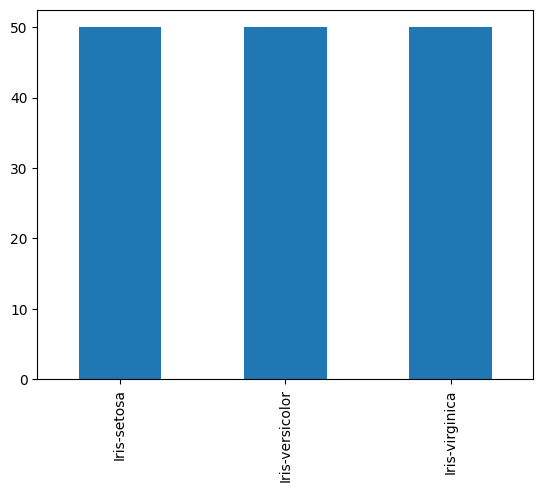

In [8]:
df.Species.value_counts().plot.bar()

You can see that there are 3 species and 50 flowers for each type of species.


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to classify


In [9]:
target = df["Species"]

We identify the features next. Features are the input values our machine learning model learns from


In [10]:
features = df[["SepalLengthCm", "SepalWidthCm",
               "PetalLengthCm", "PetalWidthCm"]]

## Task 3 - Build and train a classifier


Create a Logistic Regression model


In [11]:
classifier = LogisticRegression()

Train/Fit the model


In [12]:
classifier.fit(features, target)

LogisticRegression()

## Task 4 - Evaluate the model


Your model is now trained. Time to evaluate the model.


In [13]:
# Higher the score, better the model.
classifier.score(features, target)

0.9733333333333334

Make predictions. Let us predict the species of a flower with SepalLengthCm = 5.4, SepalWidthCm = 2.6, PetalLengthCm = 4.1, PetalWidthCm = 1.3


In [14]:
classifier.predict([[5.4, 2.6, 4.1, 1.3]])

array(['Iris-versicolor'], dtype=object)

# Exercises


In [15]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/cancer.csv"

### Exercise 1 - Load a dataset


Load the cancer dataset available at URL2


In [16]:
df2 = pd.read_csv(URL2)

### Exercise 2 - Identify the target column and the data columns


- use the diagnosis column as target
- use all the other columns except diagnosis as features


In [17]:
df2.sample(5)

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
163,12.34,79.85,464.5,0.10120,0.10150,0.0537,0.1551,Benign
128,15.10,99.58,674.5,0.11500,0.18070,0.1138,0.2001,Benign
244,19.40,129.10,1155.0,0.10270,0.15580,0.2049,0.1978,Malignant
125,13.85,88.44,588.7,0.08785,0.06136,0.0142,0.1614,Benign
23,21.16,137.20,1404.0,0.09428,0.10220,0.1097,0.1769,Malignant


<Axes: ylabel='diagnosis'>

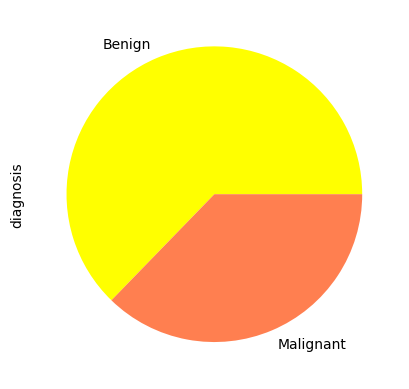

In [32]:
df2['diagnosis'].value_counts().plot.pie(colors=['yellow', 'coral'])

In [18]:
target = df2["diagnosis"]
features = df2[['radius_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']]

### Exercise 3 - Build and Train a new classifier


Create a new Classifier


In [20]:
classifier2 = LogisticRegression()
classifier2.fit(features, target)

LogisticRegression()

### Exercise 4 - Evaluate the model


Print the score of the model


In [21]:
# your code goes here
classifier2.score(features, target)

0.8963093145869947

### Exercise 5 - Find out if a tumor is cancerous


Classify the tumor with

'radius_mean' = 13.45,
'perimeter_mean'= 86.6,
'area_mean' = 555.1,
'smoothness_mean' = 0.1022,
'compactness_mean' = 0.08165,
'concavity_mean' = 0.03974,
'symmetry_mean' = 0.1638


In [22]:
# your code goes here
classifier2.predict([[13.45, 86.6, 555.1, 0.1022, 0.08165, 0.03974, 0.1638]])

array(['Benign'], dtype=object)

Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


## Contributors

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description      |
| ----------------- | ------- | ----------------- | ----------------------- |
| 2023-04-14        | 0.1     | Ramesh Sannareddy | Initial Version Created |
| 2023-06-20        | 0.3     | Vicky Kuo         | Proofreading            |


Copyright © 2023 IBM Corporation. All rights reserved.
